### Merge data

Merge input files into one dataframe


In [8]:
import os
import pandas as pd

current_folder = os.path.abspath('')


movies_path = os.path.join(
    current_folder,
    '..',
    'data',
    'original',
    'movies.csv')

ratings_path = os.path.join(
    current_folder,
    '..',
    'data',
    'original',
    'ratings.csv')

movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

df_merged = pd.merge(movies, ratings, on='movieId')


merged_path = os.path.join(
    current_folder,
    '..',
    'data',
    'merged',
    'merged.csv')

df_merged.to_csv(merged_path)





df_aggregated = pd.DataFrame(df_merged.groupby('title')['rating'].mean())

df_aggregated['rating_count'] = pd.DataFrame(df_merged.groupby('title')['rating'].count())

df_aggregated.head()


aggregated_path = os.path.join(
    current_folder,
    '..',
    'data',
    'merged',
    'aggregated.csv')
df_aggregated.to_csv(aggregated_path)



In [30]:

# Calculate count rating of all movies
df_merged.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

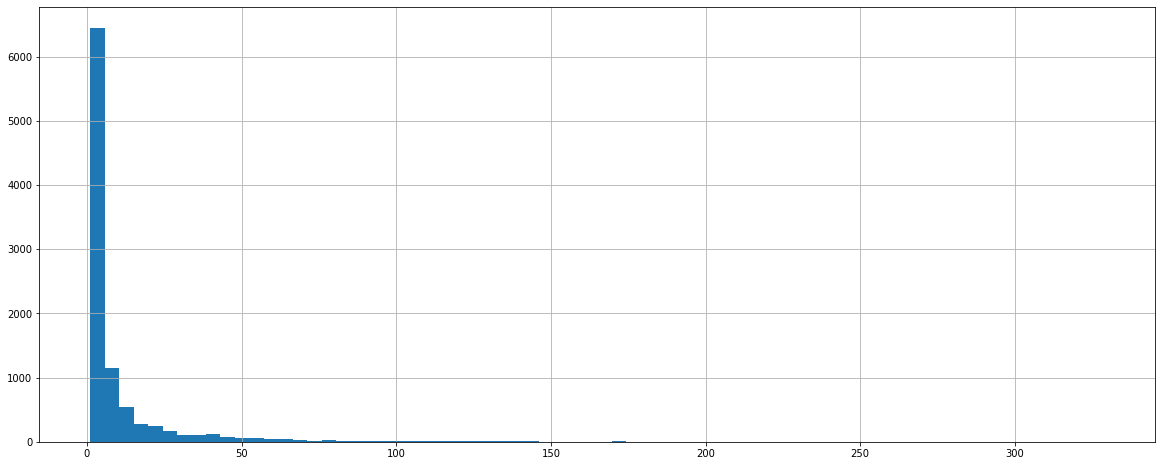

In [14]:

import matplotlib.pyplot as plt


plt.figure(figsize =(20, 8))
 
df_aggregated['rating_count'].hist(bins = 70)


<AxesSubplot:>

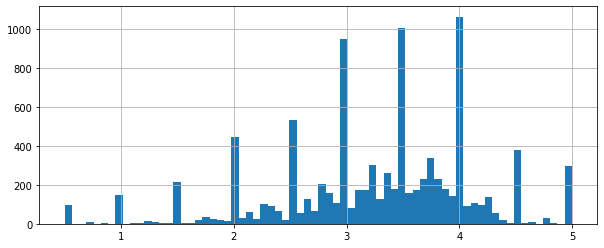

In [15]:
plt.figure(figsize =(10, 4))
 
df_aggregated['rating'].hist(bins = 70)


In [33]:
# Sorting values according to
# the 'num of rating column'
moviemat = df_merged.pivot_table(index ='userId',
              columns ='title', values ='rating')
 
moviemat.head()

moviemat_path = os.path.join(
    current_folder,
    '..',
    'data',
    'merged',
    'moviemat.csv')
moviemat.to_csv(moviemat_path)

df_aggregated.sort_values('rating_count', ascending = False).head(10)


,rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [56]:
movie_name = 'Star Trek (2009)'


moviemat[movie_name]

user_ratings = moviemat[movie_name]
user_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Star Trek (2009), dtype: float64

In [57]:
similar_to_movie = moviemat.corrwith(user_ratings)

 
corr_movie = pd.DataFrame(similar_to_movie, columns =['Correlation'])
corr_movie.dropna(inplace = True)
 
corr_movie.sort_values('Correlation', ascending = False).head(10)

D:\Program Files\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Program Files\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
RV (2006),1.0
Speed Racer (2008),1.0
"Smurfs, The (2011)",1.0
Breach (2007),1.0
Gray's Anatomy (1996),1.0
"Brave One, The (2007)",1.0
Some Kind of Wonderful (1987),1.0
"Sound of Thunder, A (2005)",1.0
Species II (1998),1.0


In [58]:

# Similar movies as of liarliar
corr_movie = pd.DataFrame(similar_to_movie, columns =['Correlation'])
corr_movie.dropna(inplace = True)
 
corr_movie = corr_movie.join(df_aggregated['rating_count'])
corr_movie[corr_movie['rating_count']>100].sort_values('Correlation', ascending = False).head()

,Correlation,rating_count
title,,
Star Wars: Episode VI - Return of the Jedi (1983),0.698083,196
Harry Potter and the Chamber of Secrets (2002),0.662398,102
Star Wars: Episode I - The Phantom Menace (1999),0.656503,140
"Lord of the Rings: The Return of the King, The (2003)",0.641521,185
"Fugitive, The (1993)",0.611124,190
